In [1]:
import os, cv2, sys
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# categories = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
width = 80
height = 80
path = 'Downloads/archive/Tomato_images'
X = []
y = []
categories = os.listdir(path)
for  category in categories:
    folder_path = os.path.join(path, category)
    img_names = os.listdir(folder_path)
    for img_name in img_names:
        full_path = os.path.join(path, category, img_name)
        try:
            img = cv2.imread(full_path, 0)
            img = cv2.resize(img, (height, width))
            img_feature = np.reshape(img, (height*width))
            X.append(img_feature)
            y.append(category)
        except:
            print("Error")
            
imgs = np.array(X)
lbls = np.array(y)

le = LabelEncoder()
le.fit(lbls)
lbls_encoded = le.transform(lbls)

X_train, X_test, y_train, y_test = train_test_split(imgs, lbls_encoded, test_size=0.2,random_state=42)

# X_train, X_test = X_train / 255.0, X_test / 255.0

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
from sklearn.svm import SVC

model = SVC(C=1, kernel='poly', gamma=10)

model.fit(X_train, y_train)

SVC(C=1, gamma=10, kernel='poly')

In [18]:
predict = model.predict(X_test)
accurcay = model.score(X_test, y_test)

In [19]:
print(accurcay)

0.8696236559139785


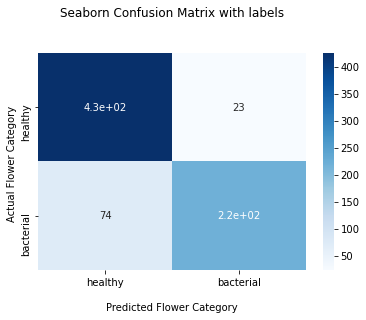

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
confusion = confusion_matrix(y_test, predict)
ax = sns.heatmap(confusion, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Flower Category')
ax.set_ylabel('Actual Flower Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['healthy','bacterial'])
ax.yaxis.set_ticklabels(['healthy','bacterial'])

## Display the visualization of the Confusion Matrix.
plt.show()



AttributeError: 'SVC' object has no attribute 'estimator'